## ML 프로젝트 : Predict Customer Churn in telecom company

## 1. 데이터 불러오기 및 기본정리

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
sns.set(color_codes=True)
# sns.set(font=‘Arial Unicode MS’)

import matplotlib.pyplot as plt
from matplotlib import rc
rc('font', family='Arial Unicode MS')
%matplotlib inline

In [2]:
train = pd.read_csv('./data/cell2celltrain.csv')
test = pd.read_csv('./data/cell2cellholdout.csv')

In [3]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51047 entries, 0 to 51046
Data columns (total 58 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   CustomerID                 51047 non-null  int64  
 1   Churn                      51047 non-null  object 
 2   MonthlyRevenue             50891 non-null  float64
 3   MonthlyMinutes             50891 non-null  float64
 4   TotalRecurringCharge       50891 non-null  float64
 5   DirectorAssistedCalls      50891 non-null  float64
 6   OverageMinutes             50891 non-null  float64
 7   RoamingCalls               50891 non-null  float64
 8   PercChangeMinutes          50680 non-null  float64
 9   PercChangeRevenues         50680 non-null  float64
 10  DroppedCalls               51047 non-null  float64
 11  BlockedCalls               51047 non-null  float64
 12  UnansweredCalls            51047 non-null  float64
 13  CustomerCareCalls          51047 non-null  flo

In [4]:
train.iloc[:5, :20]

,CustomerID,Churn,MonthlyRevenue,MonthlyMinutes,TotalRecurringCharge,DirectorAssistedCalls,OverageMinutes,RoamingCalls,PercChangeMinutes,PercChangeRevenues,DroppedCalls,BlockedCalls,UnansweredCalls,CustomerCareCalls,ThreewayCalls,ReceivedCalls,OutboundCalls,InboundCalls,PeakCallsInOut,OffPeakCallsInOut
0,3000002,Yes,24.00,219.0,22.0,0.25,0.0,0.0,-157.0,-19.0,0.7,0.7,6.3,0.0,0.0,97.2,0.0,0.0,58.0,24.0
1,3000010,Yes,16.99,10.0,17.0,0.00,0.0,0.0,-4.0,0.0,0.3,0.0,2.7,0.0,0.0,0.0,0.0,0.0,5.0,1.0
2,3000014,No,38.00,8.0,38.0,0.00,0.0,0.0,-2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.4,0.3,0.0,1.3,3.7
3,3000022,No,82.28,1312.0,75.0,1.24,0.0,0.0,157.0,8.1,52.0,7.7,76.0,4.3,1.3,200.3,370.3,147.0,555.7,303.7
4,3000026,Yes,17.14,0.0,17.0,0.00,0.0,0.0,0.0,-0.2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [5]:
train.iloc[:5, 20:40]

,DroppedBlockedCalls,CallForwardingCalls,CallWaitingCalls,MonthsInService,UniqueSubs,ActiveSubs,ServiceArea,Handsets,HandsetModels,CurrentEquipmentDays,AgeHH1,AgeHH2,ChildrenInHH,HandsetRefurbished,HandsetWebCapable,TruckOwner,RVOwner,Homeownership,BuysViaMailOrder,RespondsToMailOffers
0,1.3,0.0,0.3,61,2,1,SEAPOR503,2.0,2.0,361.0,62.0,0.0,No,No,Yes,No,No,Known,Yes,Yes
1,0.3,0.0,0.0,58,1,1,PITHOM412,2.0,1.0,1504.0,40.0,42.0,Yes,No,No,No,No,Known,Yes,Yes
2,0.0,0.0,0.0,60,1,1,MILMIL414,1.0,1.0,1812.0,26.0,26.0,Yes,No,No,No,No,Unknown,No,No
3,59.7,0.0,22.7,59,2,2,PITHOM412,9.0,4.0,458.0,30.0,0.0,No,No,Yes,No,No,Known,Yes,Yes
4,0.0,0.0,0.0,53,2,2,OKCTUL918,4.0,3.0,852.0,46.0,54.0,No,No,No,No,No,Known,Yes,Yes


In [6]:
train.iloc[:5, 40:]

,OptOutMailings,NonUSTravel,OwnsComputer,HasCreditCard,RetentionCalls,RetentionOffersAccepted,NewCellphoneUser,NotNewCellphoneUser,ReferralsMadeBySubscriber,IncomeGroup,OwnsMotorcycle,AdjustmentsToCreditRating,HandsetPrice,MadeCallToRetentionTeam,CreditRating,PrizmCode,Occupation,MaritalStatus
0,No,No,Yes,Yes,1,0,No,No,0,4,No,0,30,Yes,1-Highest,Suburban,Professional,No
1,No,No,Yes,Yes,0,0,Yes,No,0,5,No,0,30,No,4-Medium,Suburban,Professional,Yes
2,No,No,No,Yes,0,0,Yes,No,0,6,No,0,Unknown,No,3-Good,Town,Crafts,Yes
3,No,No,No,Yes,0,0,Yes,No,0,6,No,0,10,No,4-Medium,Other,Other,No
4,No,No,Yes,Yes,0,0,No,Yes,0,9,No,1,10,No,1-Highest,Other,Professional,Yes


In [7]:
# 필요없는 컬럼 drop
# CustomerID, ServiceArea, AgeHH1, AgeHH2, 

train = train.drop(['CustomerID','ServiceArea', 'AgeHH1', 'AgeHH2'], axis=1)
test = test.drop('ServiceArea', axis=1)

In [8]:
train['Churn'].value_counts()

Churn
No     36336
Yes    14711
Name: count, dtype: int64

### 시각화

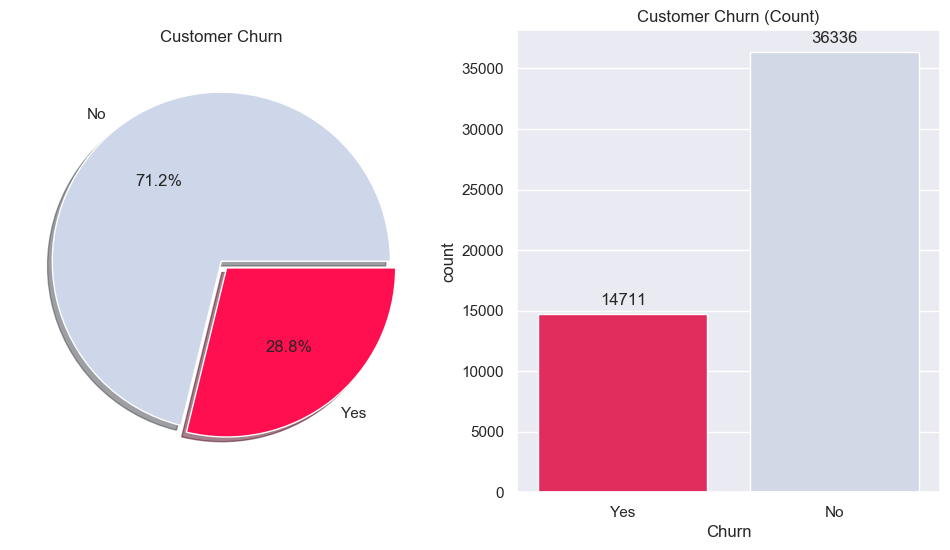

In [9]:
f, ax = plt.subplots(1, 2, figsize = (12, 6)) 

train['Churn'].value_counts().plot.pie(explode = [0, 0.05], # 각 조각 사이 거리
                                            autopct='%1.1f%%', # 퍼센트 표시
                                            ax=ax[0], # 첫번째 위치에 그리기 
                                            colors=['#CED7EA', '#ff0f4f'],
                                            shadow=True) 


ax[0].set_title('Customer Churn')
ax[0].set_ylabel('') 

sns.countplot(data=train, x='Churn', ax=ax[1], palette=['#ff0f4f','#CED7EA'])
ax[1].set_title('Customer Churn (Count)')
for p in ax[1].patches: # 데이터 텍스트 표시 
    ax[1].annotate(format(p.get_height(), '.0f'), (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center', xytext=(0, 10), textcoords='offset points')

# ax[1].set_xticklabels(['Yes', 'No'])

plt.show()

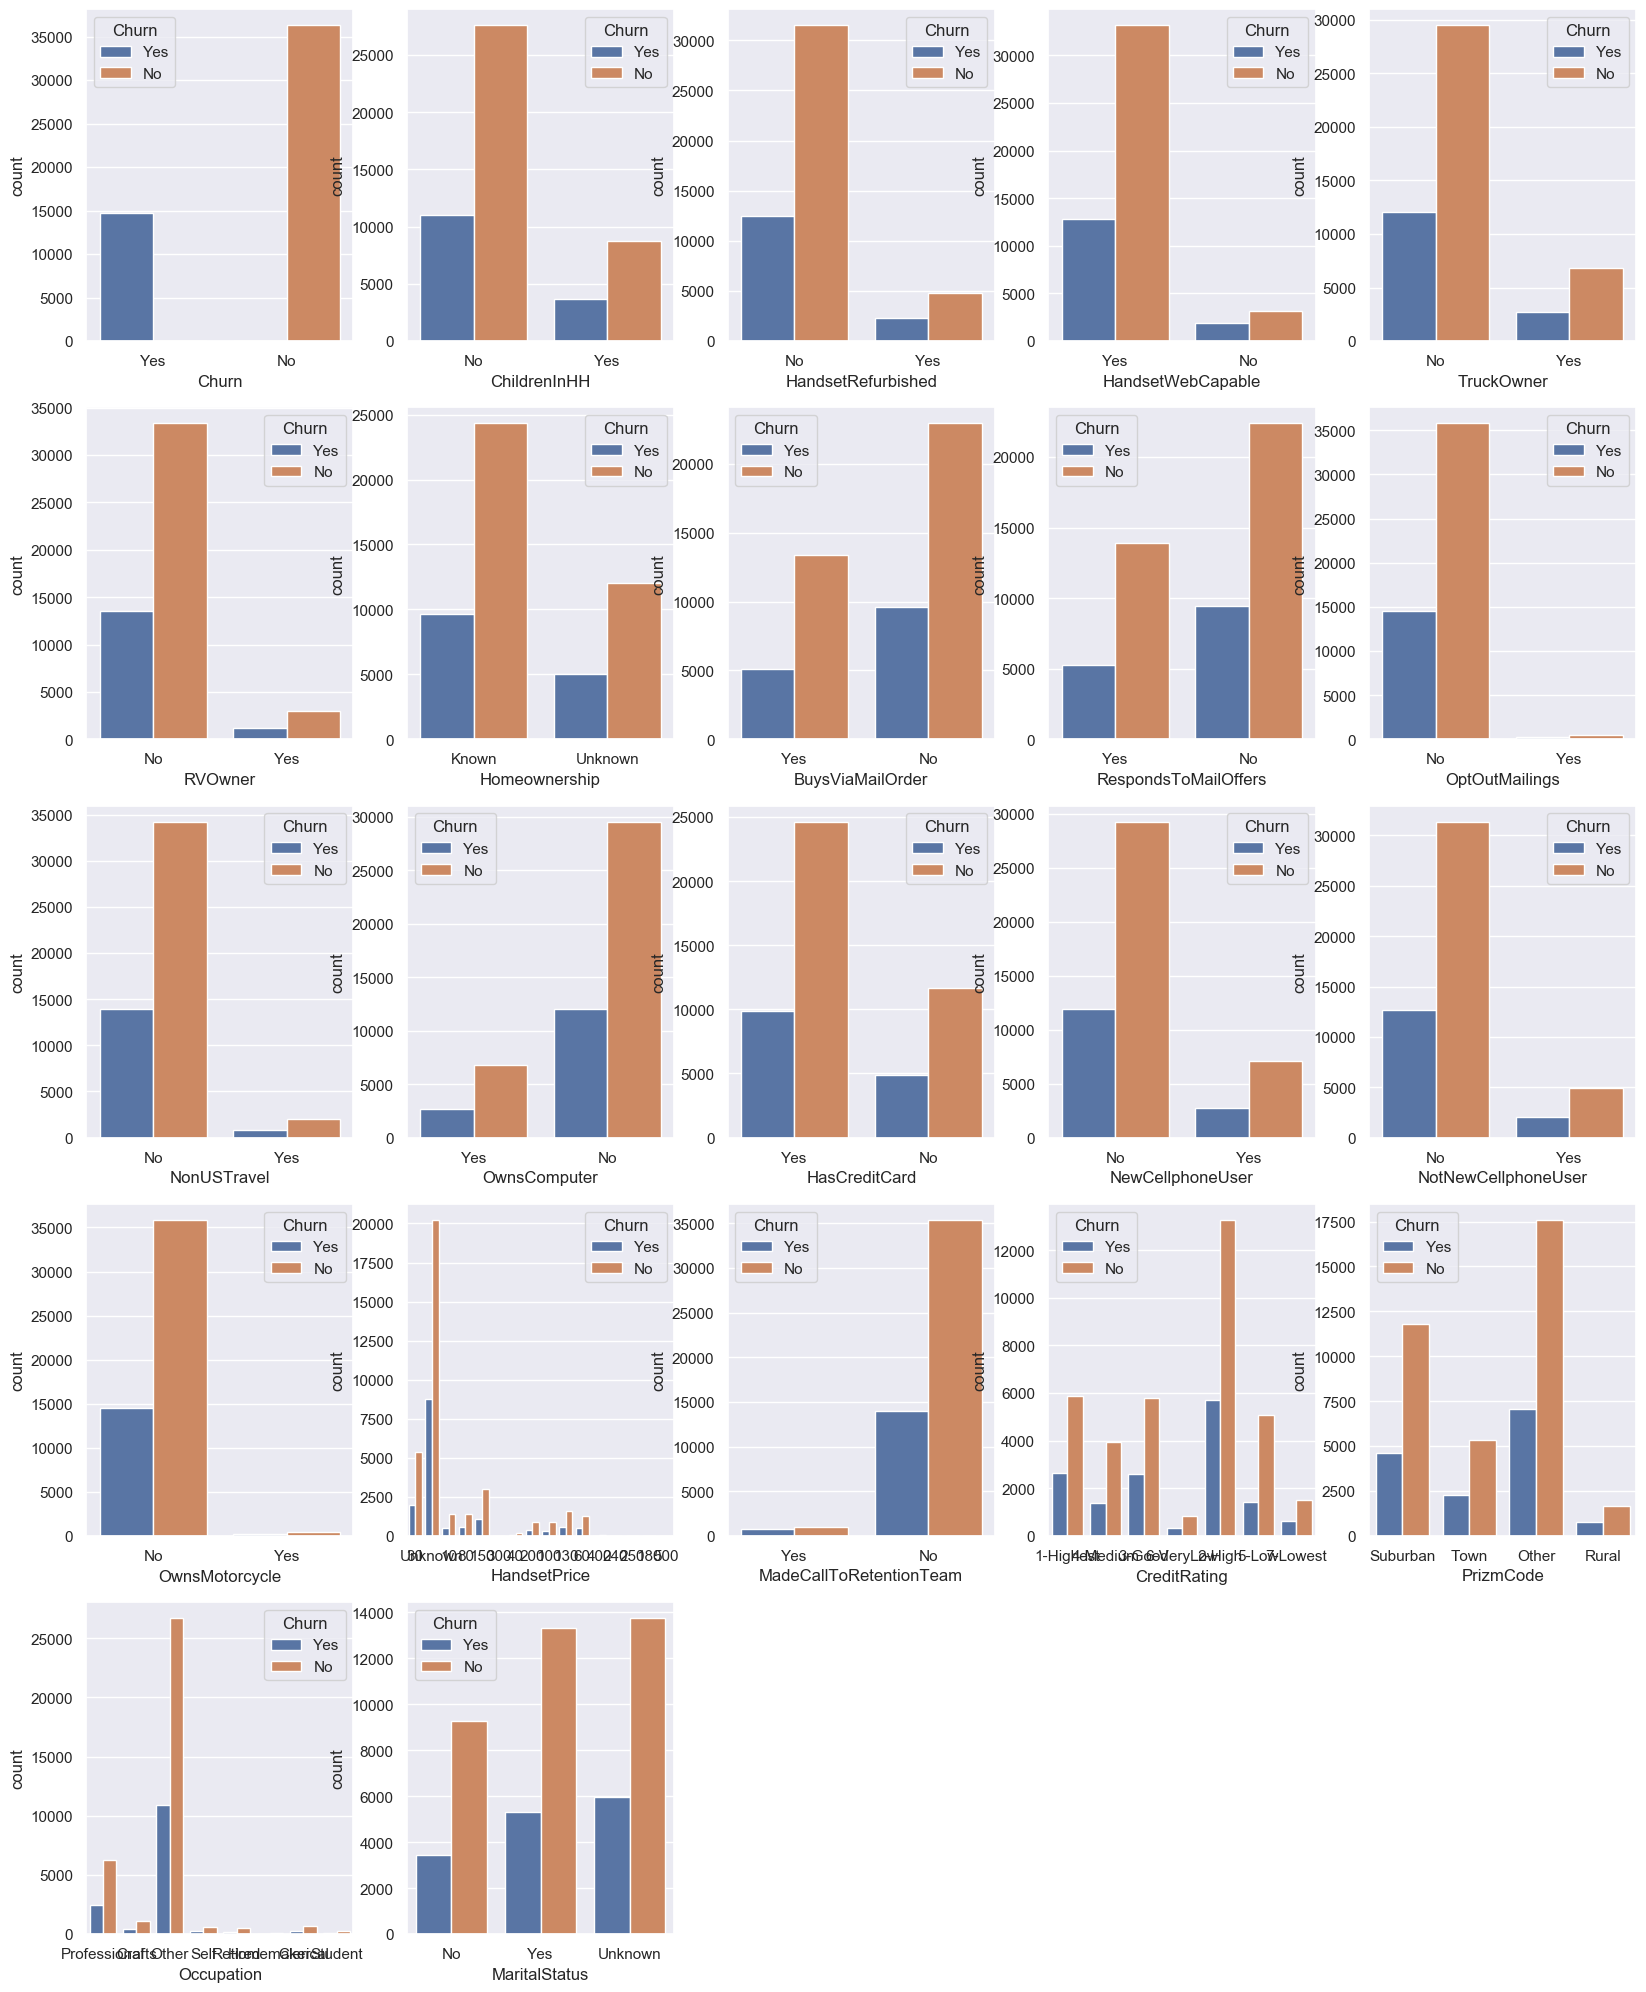

In [10]:
plots_per_row = 5

number_of_plots = train.select_dtypes(include=['object']).shape[-1]

fig, axes = plt.subplots((number_of_plots//plots_per_row) + (number_of_plots % 5 != 0), plots_per_row)

axes = axes.flatten()

count = 0
for index, col in train.select_dtypes(include=['object']).columns.to_series().items():
    a = sns.countplot(x=train[col], hue=train.Churn, ax=axes[count])
    a.tick_params(axis='x')
    count += 1
    
for i in range(1, len(axes) - number_of_plots + 1):
    fig.delaxes(axes[-i]) # 빈 subplot은 삭제
    
fig.set_figwidth(20)
fig.set_figheight(25)
plt.show()

### 전처리
1. 결측치 처리 (채우기 : 평균/최빈값)
2. 범주형 데이터 -> 라벨인코딩
3. SMOTE 기법으로 over_sampling

In [11]:
# 결측치 찾기
train.isnull().sum().sort_values(ascending=False)[train.isnull().sum() > 0]

PercChangeMinutes        367
PercChangeRevenues       367
MonthlyMinutes           156
TotalRecurringCharge     156
DirectorAssistedCalls    156
OverageMinutes           156
RoamingCalls             156
MonthlyRevenue           156
CurrentEquipmentDays       1
Handsets                   1
HandsetModels              1
dtype: int64

**1. 결측치 처리**
- 숫자형 데이터 : 평균
- 범주형 데이터 : 최빈값

In [12]:
def fill_missing_values(df):
    for col in df.columns:
        if df[col].dtype == float or df[col].dtype == int:
            mean = df[col].mean()
            df[col].fillna(mean, inplace=True)
        elif df[col].dtype == object:
            mode = df[col].mode().iloc[0]
            df[col].fillna(mode, inplace=True)
        else:
            continue
        
    return df

In [13]:
train = fill_missing_values(train)

**2. LabelEncoding (object 데이터)**

In [14]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

for col in list(train.columns):
    if train.dtypes[col] == object:
        train[col] = le.fit_transform(train[col])
        
# for col in list(test.columns):
#     if test.dtypes[col] == object:
#         test[col] = le.fit_transform(test[col])

**3. SMOTE (over_sampling)**

In [15]:
from sklearn.model_selection import train_test_split

X = train.drop(['Churn'], axis=1)
y = train['Churn']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=70)

In [16]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state=70)
X_resampled, y_resampled = smote.fit_resample(X, y)
train_ov = pd.concat([X_resampled, y_resampled], axis=1)


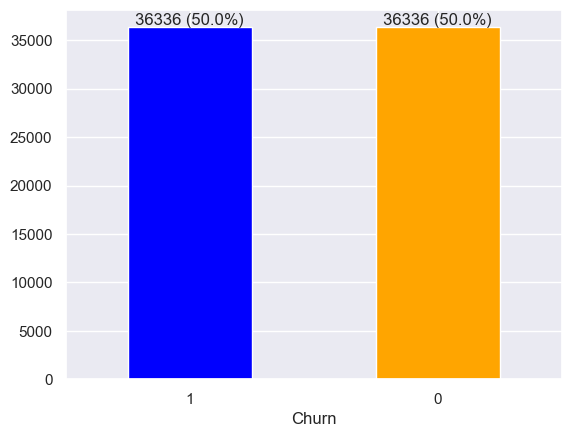

In [18]:
value_counts = train_ov['Churn'].value_counts()

# 막대 그래프 그리기
ax = value_counts.plot(kind='bar', color=['blue', 'orange'])

# 각 값의 카운트를 막대 위에 표시
def autolabel_percent(rects):
    for rect in rects:
        height = rect.get_height()
        ax.text(rect.get_x() + rect.get_width() / 2, height,
                f'{height} ({height / value_counts.sum() * 100:.1f}%)',
                ha='center', va='bottom')

autolabel_percent(ax.patches)

plt.xticks(rotation=360)
# 그래프 출력
plt.show()

In [19]:
train_ov.head()

,MonthlyRevenue,MonthlyMinutes,TotalRecurringCharge,DirectorAssistedCalls,OverageMinutes,RoamingCalls,PercChangeMinutes,PercChangeRevenues,DroppedCalls,BlockedCalls,...,IncomeGroup,OwnsMotorcycle,AdjustmentsToCreditRating,HandsetPrice,MadeCallToRetentionTeam,CreditRating,PrizmCode,Occupation,MaritalStatus,Churn
0,24.00,219.0,22.0,0.25,0.0,0.0,-157.0,-19.0,0.7,0.7,...,4,0,0,8,1,0,2,4,0,1
1,16.99,10.0,17.0,0.00,0.0,0.0,-4.0,0.0,0.3,0.0,...,5,0,0,8,0,3,2,4,2,1
2,38.00,8.0,38.0,0.00,0.0,0.0,-2.0,0.0,0.0,0.0,...,6,0,0,15,0,2,3,1,2,0
3,82.28,1312.0,75.0,1.24,0.0,0.0,157.0,8.1,52.0,7.7,...,6,0,0,0,0,3,0,3,0,0
4,17.14,0.0,17.0,0.00,0.0,0.0,0.0,-0.2,0.0,0.0,...,9,0,1,0,0,0,0,4,2,1


---

#### some more thoughts.

- skewed 가 너무 심한 컬럼도 다 사용하는 데에 의미가 있는가?

In [74]:
# train.columns

In [69]:
value_counts = train['ReceivedCalls'].value_counts()
total_rows = len(train)
proportion = value_counts / total_rows * 100
tmp = pd.DataFrame({'Count': value_counts, 'Proportion': proportion.round(2)})
tmp.sort_values(by='Proportion', ascending=False).head(10)

,Count,Proportion
ReceivedCalls,,
0.0,6337,12.41
0.1,241,0.47
0.2,225,0.44
0.3,183,0.36
0.6,164,0.32
0.4,159,0.31
0.7,157,0.31
0.5,156,0.31
0.8,135,0.26


---

### Case1 : '고객 사용 패턴'을 바탕으로 진행

In [22]:
# customer usage pattern (10가지 특성)
usage_pattern = ['Churn', 'MonthlyMinutes', 'OverageMinutes', 'RoamingCalls',
                 'PercChangeMinutes', 'DroppedCalls', 'UnansweredCalls', 
                 'OutboundCalls', 'InboundCalls', 'PeakCallsInOut', 'OffPeakCallsInOut']

In [23]:
train_case1 = train_ov[usage_pattern].copy()
train_case1

,Churn,MonthlyMinutes,OverageMinutes,RoamingCalls,PercChangeMinutes,DroppedCalls,UnansweredCalls,OutboundCalls,InboundCalls,PeakCallsInOut,OffPeakCallsInOut
0,1,219.000000,0.000000,0.000000,-157.000000,0.700000,6.300000,0.000000,0.000000,58.000000,24.000000
1,1,10.000000,0.000000,0.000000,-4.000000,0.300000,2.700000,0.000000,0.000000,5.000000,1.000000
2,0,8.000000,0.000000,0.000000,-2.000000,0.000000,0.000000,0.300000,0.000000,1.300000,3.700000
3,0,1312.000000,0.000000,0.000000,157.000000,52.000000,76.000000,370.300000,147.000000,555.700000,303.700000
4,1,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...
72667,1,1619.817610,98.096498,0.358701,-1602.004140,26.148844,261.561211,126.909236,47.607968,262.169885,737.325181
72668,1,503.212566,0.000000,0.000000,255.627012,16.194786,57.344985,25.407352,2.195120,154.665302,86.892249
72669,1,4.549176,0.000000,0.000000,-4.549176,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
72670,1,97.353837,5.338459,0.000000,-9.142318,0.799231,13.418845,9.395764,1.134615,21.049616,16.446540


In [24]:
from sklearn.model_selection import train_test_split

X = train_case1.drop(['Churn'], axis=1)
y = train_case1['Churn']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=70, stratify=y)

**분류기 import & 정의**

In [28]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from lightgbm import LGBMClassifier

dt_clf = DecisionTreeClassifier(random_state=70, max_depth=4)
dt_clf.fit(X_train, y_train)
pred_dt = dt_clf.predict(X_test)

lr_clf = LogisticRegression(random_state=70, solver='liblinear')
lr_clf.fit(X_train, y_train)
pred_lr = lr_clf.predict(X_test)

rf_clf = RandomForestClassifier(random_state=70, n_jobs=-1, n_estimators=100)
rf_clf.fit(X_train, y_train)
pred_rf = rf_clf.predict(X_test)

gb_clf = GradientBoostingClassifier(random_state=70)
gb_clf.fit(X_train, y_train)
pred_gb = gb_clf.predict(X_test)

evals = [(X_test.values, y_test)]
lgbm_clf = LGBMClassifier(random_state=70, n_estimators=1000, n_jobs=-1,
                          num_leaves=64, boost_from_average=False)
lgbm_clf.fit(X_train.values, y_train)
pred_lgbm = lgbm_clf.predict(X_test)

**모델 성능 출력하는 함수 정의**

In [29]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

# 모델 성능값 만들기
def get_clf_eval(y_yest, pred):
    acc = accuracy_score(y_test, pred)
    pre = precision_score(y_test, pred)
    re = recall_score(y_test, pred)
    f1 = f1_score(y_test, pred)
    auc = roc_auc_score(y_test, pred)
    
    return acc, pre, re, f1, auc

# 모델 성능 돌리기
def get_result(model, X_train, y_train, X_test, y_test):
    model.fit(X_train, y_train)
    pred = model.predict(X_test)
    
    return get_clf_eval(y_test, pred)

# DataFrame으로 만들기
def get_result_pd(models, model_names, X_train, y_train, X_test, y_test):
    col_names = ['Accuracy', 'Precision', 'Recall', 'F1', 'Roc_Auc']
    
    tmp = []
    
    for model in models:
        tmp.append(get_result(model, X_train, y_train, X_test, y_test))
        
    return pd.DataFrame(tmp, columns=col_names, index=model_names)

In [30]:
%%time

# 설정한 5가지 모델 돌려서 성능비교표 만들기
models = [dt_clf, lr_clf, rf_clf, gb_clf, lgbm_clf]
model_names = ['DecisionTree', 'LogisticRegression','RandomForest', 'GradientBoosting', 'LightGBM']

result = get_result_pd(models, model_names, X_train, y_train, X_test, y_test)
result

CPU times: user 28.5 s, sys: 4.15 s, total: 32.6 s
Wall time: 16.2 s


,Accuracy,Precision,Recall,F1,Roc_Auc
DecisionTree,0.589166,0.618197,0.474411,0.536843,0.589599
LogisticRegression,0.548344,0.541107,0.658655,0.594122,0.547928
RandomForest,0.740620,0.777941,0.676202,0.723512,0.740863
GradientBoosting,0.695395,0.745912,0.596143,0.662671,0.695770
LightGBM,0.772498,0.848196,0.665875,0.746058,0.772900


훈련 데이터 셋의 Churn 의 Yes(1) / No(0) 비율은
- No 71.2%, Yes 28.8

In [17]:
churn = train['Churn'].value_counts()
churn_pct = np.round(churn.div(churn.sum()) * 100, 1)
churn_df = pd.merge(churn, churn_pct, on=churn.index)
churn_df.rename(columns={
                    'key_0': 'Churn',
                    'count_x': 'Count',
                    'count_y': 'Percentage'},
                inplace=True)
churn_df

,Churn,Count,Percentage
0,0,36336,71.2
1,1,14711,28.8


데이터셋을 2가지로 나누어서 진행
- case1. 전체 features 포함
- case2. 위 15개 features 만 포함

---

## 2. 모델링 진행
- Decision Tree
- Random Forest
- LightGBM

### 2.1. case1

#### train_test_split

In [22]:
from sklearn.model_selection import train_test_split

X = train.drop(['Churn'], axis=1)
y = train['Churn']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=13)

In [23]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((35732, 56), (15315, 56), (35732,), (15315,))

#### 2.1.1. Decision Tree

In [24]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

dt_clf = DecisionTreeClassifier(max_depth=4, random_state=13)
dt_clf.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=4, random_state=13)

In [25]:
pred = dt_clf.predict(X_test)
accuracy_score(y_test, pred)

0.7179236043095005

**max_depth 를 다양하게 적용, 최적값 찾기**

In [26]:
from sklearn.model_selection import GridSearchCV

params = {
    'max_depth': [2, 4, 8, 10, 12, 15, 20, 30]
}

In [27]:
grid_cv = GridSearchCV(dt_clf, param_grid=params,
                       scoring='accuracy',
                       return_train_score=True
                       )
grid_cv.fit(X_train, y_train)

GridSearchCV(estimator=DecisionTreeClassifier(max_depth=4, random_state=13),
             param_grid={'max_depth': [2, 4, 8, 10, 12, 15, 20, 30]},
             return_train_score=True, scoring='accuracy')

In [28]:
grid_cv.best_score_, grid_cv.best_params_

(0.7146535406889137, {'max_depth': 4})

**실제 test 데이터에서의 결과**

In [29]:
max_depth = [2, 4, 8, 10, 12]

for depth in max_depth:
    dt_clf = DecisionTreeClassifier(max_depth=depth, random_state=13)
    dt_clf.fit(X_train, y_train)

    pred = dt_clf.predict(X_test)
    acc = accuracy_score(y_test, pred)

    print('Max_depth : ', depth, 'Acc : ', acc)


Max_depth :  2 Acc :  0.7174665360757427
Max_depth :  4 Acc :  0.7179236043095005
Max_depth :  8 Acc :  0.7153770812928502
Max_depth :  10 Acc :  0.7102187397975841
Max_depth :  12 Acc :  0.6989879203395364


In [30]:
max_depth = [2, 3, 4, 5, 6, 7]

for depth in max_depth:
    dt_clf = DecisionTreeClassifier(max_depth=depth, random_state=13)
    dt_clf.fit(X_train, y_train)

    pred = dt_clf.predict(X_test)
    acc = accuracy_score(y_test, pred)

    print('Max_depth : ', depth, 'Acc : ', acc)


Max_depth :  2 Acc :  0.7174665360757427
Max_depth :  3 Acc :  0.7175971269996735
Max_depth :  4 Acc :  0.7179236043095005
Max_depth :  5 Acc :  0.7167482859941234
Max_depth :  6 Acc :  0.7183153770812929
Max_depth :  7 Acc :  0.715181194906954


In [31]:
# GridSearchCV 사용
best_dt_clf = grid_cv.best_estimator_
pred1 = best_dt_clf.predict(X_test)

accuracy_score(y_test, pred1)

0.7179236043095005

- Decision Tree 는 max_depth = 4 일때 최고성능

#### 2.1.2 Random Forest

In [32]:
from sklearn.ensemble import RandomForestClassifier

params = {
    'max_depth' : [4,6,8,10,15],
    'n_estimators' : [50, 100, 200],
    'min_samples_leaf' : [8, 12],
    'min_samples_split' : [8, 12]
}

In [33]:
rf_clf = RandomForestClassifier(random_state=13, n_jobs=-1)
grid_cv = GridSearchCV(rf_clf, param_grid=params, cv=2, n_jobs=-1)
grid_cv.fit(X_train, y_train)

GridSearchCV(cv=2, estimator=RandomForestClassifier(n_jobs=-1, random_state=13),
             n_jobs=-1,
             param_grid={'max_depth': [4, 6, 8, 10, 15],
                         'min_samples_leaf': [8, 12],
                         'min_samples_split': [8, 12],
                         'n_estimators': [50, 100, 200]})

In [34]:
cv_result_df = pd.DataFrame(grid_cv.cv_results_)
cv_result_df[['rank_test_score', 'mean_test_score', 'param_n_estimators', 'param_max_depth']].sort_values('rank_test_score').head()

,rank_test_score,mean_test_score,param_n_estimators,param_max_depth
55,1,0.716277,100,15
51,1,0.716277,50,15
48,1,0.716277,50,15
58,1,0.716277,100,15
53,5,0.716193,200,15


**실제 test 데이터에서의 결과**

In [35]:
rf_clf_best = grid_cv.best_estimator_
rf_clf_best.fit(X_train, y_train)

RandomForestClassifier(max_depth=15, min_samples_leaf=8, min_samples_split=8,
                       n_estimators=50, n_jobs=-1, random_state=13)

In [36]:
pred2 = rf_clf_best.predict(X_test)
accuracy_score(y_test, pred2)

0.7211883774077702

- DT 에서 71.7923% 확률
- RF 에서 72.1188% 확률

#### 2.1.3 중요 features 확인 및 re_modeling

In [37]:
best_cols_values = rf_clf_best.feature_importances_

In [38]:
best_cols = pd.Series(best_cols_values, index=X_train.columns)
top20_cols = best_cols.sort_values(ascending=False)[:20]
top20_cols

CurrentEquipmentDays    0.085488
MonthsInService         0.066258
MonthlyMinutes          0.058741
PercChangeMinutes       0.057870
CustomerID              0.053553
MonthlyRevenue          0.042241
PercChangeRevenues      0.040862
PeakCallsInOut          0.037112
OffPeakCallsInOut       0.035679
TotalRecurringCharge    0.033178
UnansweredCalls         0.032345
ReceivedCalls           0.030559
OverageMinutes          0.030162
OutboundCalls           0.029519
DroppedBlockedCalls     0.028246
AgeHH1                  0.027747
DroppedCalls            0.025242
InboundCalls            0.023600
BlockedCalls            0.021665
CreditRating            0.017561
dtype: float64

**상위 20개 특성만 가지고 다시 성능 확인**

In [39]:
X_train_re = X_train[top20_cols.index]
X_test_re = X_test[top20_cols.index]

In [40]:
# Decision Tree
dt_clf_re = DecisionTreeClassifier(max_depth=4, random_state=13)
dt_clf_re.fit(X_train_re, y_train)

pred_re = dt_clf_re.predict(X_test_re)
accuracy_score(y_test, pred)

0.715181194906954

- 기존 71.9 -> 71.5 조정

In [209]:
rf_clf_best_re = grid_cv.best_estimator_
rf_clf_best_re.fit(X_train_re, y_train.values.reshape(-1,))

RandomForestClassifier(max_depth=15, min_samples_leaf=8, min_samples_split=8,
                       n_estimators=50, n_jobs=-1, random_state=13)

In [211]:
pred2_re = rf_clf_best_re.predict(X_test_re)
accuracy_score(y_test, pred2_re)

0.7195559908586353

- 기존 72.1188 -> 71.9559 조정

#### 2.1.4. LightGBM
- 중요 features 로만 확인

In [259]:
from lightgbm import LGBMClassifier
import time

evals = [(X_test_re.values, y_test)]

start_time = time.time()
lgbm = LGBMClassifier(n_estimators=400)
lgbm.fit(X_train_re.values, y_train, early_stopping_rounds=20, eval_set=evals)

/Users/sangminkim/miniforge3/lib/python3.10/site-packages/lightgbm/sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "


[1]	valid_0's binary_logloss: 0.592018
[2]	valid_0's binary_logloss: 0.587948
[3]	valid_0's binary_logloss: 0.584553
[4]	valid_0's binary_logloss: 0.581688
[5]	valid_0's binary_logloss: 0.579245
[6]	valid_0's binary_logloss: 0.577229
[7]	valid_0's binary_logloss: 0.575474
[8]	valid_0's binary_logloss: 0.574058
[9]	valid_0's binary_logloss: 0.572796
[10]	valid_0's binary_logloss: 0.571561
[11]	valid_0's binary_logloss: 0.570619
[12]	valid_0's binary_logloss: 0.569819
[13]	valid_0's binary_logloss: 0.568881
[14]	valid_0's binary_logloss: 0.568383
[15]	valid_0's binary_logloss: 0.567605
[16]	valid_0's binary_logloss: 0.566983
[17]	valid_0's binary_logloss: 0.566321
[18]	valid_0's binary_logloss: 0.565627
[19]	valid_0's binary_logloss: 0.565294
[20]	valid_0's binary_logloss: 0.564806
[21]	valid_0's binary_logloss: 0.564483
[22]	valid_0's binary_logloss: 0.563992
[23]	valid_0's binary_logloss: 0.563677
[24]	valid_0's binary_logloss: 0.563507
[25]	valid_0's binary_logloss: 0.563321
[26]	vali

LGBMClassifier(n_estimators=400)

In [226]:
accuracy_score(y_test, lgbm.predict(X_test_re.values))

0.7219066274893895

LightGBM 의 경우 72.1906% 로 나온다.

---

### 2.2. case2
- corr 의 절대값이 높은 상위 15개 지표만 사용해봄
- 결과는 accuracy 가 더 떨어졌다.

In [237]:
tmp = corr.iloc[:, 1].abs().sort_values(ascending=False)

corr_best_col = tmp.index[:16].tolist()
corr_best_col

['Churn',
 'CurrentEquipmentDays',
 'MadeCallToRetentionTeam',
 'RetentionCalls',
 'HandsetWebCapable',
 'TotalRecurringCharge',
 'MonthlyMinutes',
 'CreditRating',
 'CustomerID',
 'OffPeakCallsInOut',
 'HandsetModels',
 'PeakCallsInOut',
 'ReceivedCalls',
 'CustomerCareCalls',
 'RetentionOffersAccepted',
 'UniqueSubs']

In [238]:
train_corr = train[corr_best_col]
test_corr = test[corr_best_col]

#### train_test_split

In [239]:
X = train_corr.drop(['Churn'], axis=1)
y = train_corr['Churn']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=13)

In [242]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((35732, 15), (15315, 15), (35732,), (15315,))

In [244]:
# Decision Tree
params = {
    'max_depth': [2, 3, 4, 5, 6, 7, 8, 10, 15]
}

grid_cv_corr = GridSearchCV(dt_clf, param_grid=params,
                           scoring='accuracy',
                           return_train_score=True
                           )
grid_cv_corr.fit(X_train, y_train)

grid_cv_corr.best_score_, grid_cv_corr.best_params_

(0.7137859850970176, {'max_depth': 5})

In [245]:
# 실제 Test 적용
best_dt_clf_corr = grid_cv_corr.best_estimator_
pred1_corr = best_dt_clf_corr.predict(X_test)

accuracy_score(y_test, pred1_corr)


0.7166176950701926

In [251]:
# Random Forest

params = {
    'max_depth' : [4,5,6,8],
    'n_estimators' : [50, 100, 200],
    'min_samples_leaf' : [8, 12],
    'min_samples_split' : [8, 12]
}

rf_clf_corr = RandomForestClassifier(random_state=13, n_jobs=-1)
grid_cv_corr = GridSearchCV(rf_clf_corr, param_grid=params, cv=2, n_jobs=-1)
grid_cv_corr.fit(X_train, y_train)

cv_result_df_corr = pd.DataFrame(grid_cv_corr.cv_results_)
cv_result_df_corr[['rank_test_score', 'mean_test_score', 'param_n_estimators', 'param_max_depth']].sort_values('rank_test_score').head(3)

,rank_test_score,mean_test_score,param_n_estimators,param_max_depth
38,1,0.714262,200,8
41,1,0.714262,200,8
46,3,0.714066,100,8


In [252]:
# 실제 Test 적용
rf_clf_best_corr = grid_cv_corr.best_estimator_
rf_clf_best_corr.fit(X_train, y_train)

pred2_corr = rf_clf_best_corr.predict(X_test)
accuracy_score(y_test, pred2_corr)

0.7192948090107738

In [264]:
# LightGBM

evals = [(X_test.values, y_test)]

lgbm = LGBMClassifier(n_estimators=400)
lgbm.fit(X_train.values, y_train, early_stopping_rounds=20, eval_set=evals)

accuracy_score(y_test, lgbm.predict(X_test.values))

/Users/sangminkim/miniforge3/lib/python3.10/site-packages/lightgbm/sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "


[1]	valid_0's binary_logloss: 0.592746
[2]	valid_0's binary_logloss: 0.589209
[3]	valid_0's binary_logloss: 0.586319
[4]	valid_0's binary_logloss: 0.584076
[5]	valid_0's binary_logloss: 0.582006
[6]	valid_0's binary_logloss: 0.58025
[7]	valid_0's binary_logloss: 0.578782
[8]	valid_0's binary_logloss: 0.577577
[9]	valid_0's binary_logloss: 0.57653
[10]	valid_0's binary_logloss: 0.575794
[11]	valid_0's binary_logloss: 0.575125
[12]	valid_0's binary_logloss: 0.574553
[13]	valid_0's binary_logloss: 0.574078
[14]	valid_0's binary_logloss: 0.573454
[15]	valid_0's binary_logloss: 0.572996
[16]	valid_0's binary_logloss: 0.572635
[17]	valid_0's binary_logloss: 0.572377
[18]	valid_0's binary_logloss: 0.571983
[19]	valid_0's binary_logloss: 0.571786
[20]	valid_0's binary_logloss: 0.571499
[21]	valid_0's binary_logloss: 0.571337
[22]	valid_0's binary_logloss: 0.571048
[23]	valid_0's binary_logloss: 0.570744
[24]	valid_0's binary_logloss: 0.570623
[25]	valid_0's binary_logloss: 0.570487
[26]	valid_

0.7190336271629122

* 최초에 corr 이 높은 컬럼을 기준으로 모델을 돌렸지만 오히려 성능이 더 안 좋아졌다.

---

## 모델 평가
- 앞서 accuracy score 를 확인해보았지만, imbalanced 한 데이터이므로 다른 평가방법도 확인토록 한다.

In [41]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

def get_clf_eval(y_test, pred):
    acc = accuracy_score(y_test, pred)
    pre = precision_score(y_test, pred)
    re = recall_score(y_test, pred)
    f1 = f1_score(y_test, pred)
    auc = roc_auc_score(y_test, pred)
    
    return acc, pre, re, f1, auc

In [42]:
from sklearn.metrics import confusion_matrix

def print_clf_eval(y_test, pred):
    confusion = confusion_matrix(y_test, pred)
    acc, pre, re, f1, auc = get_clf_eval(y_test, pred)
    
    print('==> Confusion matrix')
    print(confusion)
    print('=====================')
    
    print('Accuracy: {0:.4f}, Precision: {1:.4f}'.format(acc, pre))
    print('Recall: {0:.4f}, F1: {1:.4f}, AUC: {2:.4f}'.format(re, f1, auc))

In [46]:
%%time

# Decision Tree
dt_clf.fit(X_train, y_train)
dt_pred = dt_clf.predict(X_test)

print_clf_eval(y_test, dt_pred)

==> Confusion matrix
[[10517   443]
 [ 3919   436]]
Accuracy: 0.7152, Precision: 0.4960
Recall: 0.1001, F1: 0.1666, AUC: 0.5298
CPU times: user 295 ms, sys: 5 ms, total: 300 ms
Wall time: 298 ms


In [49]:
from sklearn.metrics import classification_report
print(classification_report(y_test, dt_pred))

              precision    recall  f1-score   support

           0       0.73      0.96      0.83     10960
           1       0.50      0.10      0.17      4355

    accuracy                           0.72     15315
   macro avg       0.61      0.53      0.50     15315
weighted avg       0.66      0.72      0.64     15315



In [47]:
%%time

# Random Forest
rf_clf_best.fit(X_train, y_train)
rf_pred = rf_clf_best.predict(X_test)

print_clf_eval(y_test, rf_pred)

==> Confusion matrix
[[10830   130]
 [ 4140   215]]
Accuracy: 0.7212, Precision: 0.6232
Recall: 0.0494, F1: 0.0915, AUC: 0.5188
CPU times: user 3.28 s, sys: 65.9 ms, total: 3.35 s
Wall time: 636 ms


In [50]:
print(classification_report(y_test, rf_pred))

              precision    recall  f1-score   support

           0       0.72      0.99      0.84     10960
           1       0.62      0.05      0.09      4355

    accuracy                           0.72     15315
   macro avg       0.67      0.52      0.46     15315
weighted avg       0.69      0.72      0.62     15315



In [48]:
%%time

# LGBM서
lgbm_clf = LGBMClassifier(random_state=13, n_estimators=1000, n_jobs=-1, num_leaves=64, boost_from_average=False)
lgbm_clf.fit(X_train, y_train)
lgbm_pred = lgbm_clf.predict(X_test)

print_clf_eval(y_test, lgbm_pred)

==> Confusion matrix
[[10055   905]
 [ 3466   889]]
Accuracy: 0.7146, Precision: 0.4955
Recall: 0.2041, F1: 0.2892, AUC: 0.5608
CPU times: user 7.05 s, sys: 4.9 s, total: 11.9 s
Wall time: 7.14 s


In [51]:
print(classification_report(y_test, lgbm_pred))

              precision    recall  f1-score   support

           0       0.74      0.92      0.82     10960
           1       0.50      0.20      0.29      4355

    accuracy                           0.71     15315
   macro avg       0.62      0.56      0.56     15315
weighted avg       0.67      0.71      0.67     15315



- accuracy 는 71~2%의 확률
- 그러나 imbalanced 자료로 f1-score를 확인했을 때 avg가 둘다 accuracy보다 낮다.

#### Permutation importance 사용해서 중요변수 확인해보기

---